<a href="https://colab.research.google.com/github/ajeetranaut/Assignment/blob/master/Topic_Analysis_of_Review_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Topic Analysis of Review Data
Project 1 

DESCRIPTION

Help a leading mobile brand understand the voice of the customer by analyzing the reviews of their product on Amazon and the topics that customers are talking about. You will perform topic modeling on specific parts of speech. You’ll finally interpret the emerging topics.

Problem Statement: 

A popular mobile phone brand, Lenovo has launched their budget smartphone in the Indian market. The client wants to understand the VOC (voice of the customer) on the product. This will be useful to not just evaluate the current product, but to also get some direction for developing the product pipeline. The client is particularly interested in the different aspects that customers care about. Product reviews by customers on a leading e-commerce site should provide a good view.

Domain: Amazon reviews for a leading phone brand

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving K8 Reviews v0.2.csv to K8 Reviews v0.2.csv


In [9]:
import pandas as pd
review = pd.read_csv('K8 Reviews v0.2.csv')
review.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [10]:
review_data = review.drop('sentiment',axis=1)
review_data.head()

,review
0,Good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr..."
2,when I will get my 10% cash back.... its alrea...
3,Good
4,The worst phone everThey have changed the last...


In [11]:
review_data.shape

# We have 14K reviews 

(14675, 1)

### Data Pre-Processing


### 1. Replacing/Dropping NULL values

In [12]:
review_data.isnull().sum()

# Since our data has no null values will be skip this step

review    0
dtype: int64

### 2. Converting to LOWER case

In [13]:
review_data['clean_review'] = review_data['review'].apply(lambda x: str(x).lower())
review_data.head()

,review,clean_review
0,Good but need updates and improvements,good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr...","worst mobile i have bought ever, battery is dr..."
2,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...
3,Good,good
4,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


### 3. REMOVE NON-ALPHA DATA(DIGITS,PUNCTUATIONS,DIACRITICS

In [14]:
review_data['clean_review'] = review_data['clean_review'].str.replace(r'[^a-zA-Z\s]', ' ',regex=True) 
review_data.head()


,review,clean_review
0,Good but need updates and improvements,good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr...",worst mobile i have bought ever battery is dr...
2,when I will get my 10% cash back.... its alrea...,when i will get my cash back its alrea...
3,Good,good
4,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


### 4. REMOVING WHITE SPACE

In [15]:
review_data['clean_review'] = review_data['clean_review'].str.replace(r'\s{2,}', ' ',regex=True)
review_data.head()

,review,clean_review
0,Good but need updates and improvements,good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr...",worst mobile i have bought ever battery is dra...
2,when I will get my 10% cash back.... its alrea...,when i will get my cash back its already january
3,Good,good
4,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


### 5. WORD TOKENIZATION

In [17]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
review_data['clean_review'] = review_data['clean_review'].apply(lambda x: word_tokenize(x))
review_data.head()

,review,clean_review
0,Good but need updates and improvements,"[good, but, need, updates, and, improvements]"
1,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, i, have, bought, ever, battery..."
2,when I will get my 10% cash back.... its alrea...,"[when, i, will, get, my, cash, back, its, alre..."
3,Good,[good]
4,The worst phone everThey have changed the last...,"[the, worst, phone, everthey, have, changed, t..."


### 6. REMOVE UNNECESSARY WORDS

In [19]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x:[word for word in x if word not in stopwords.words("english") and len(word) > 3 and word.isalpha()])
review_data.head()

,review,clean_review
0,Good but need updates and improvements,"[good, need, updates, improvements]"
1,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, bought, ever, battery, drainin..."
2,when I will get my 10% cash back.... its alrea...,"[cash, back, already, january]"
3,Good,[good]
4,The worst phone everThey have changed the last...,"[worst, phone, everthey, changed, last, phone,..."


In [21]:
review_data = review_data[review_data['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)
# Keeping records with more than single words

In [22]:
review_data

,review,clean_review
0,Good but need updates and improvements,"[good, need, updates, improvements]"
1,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, bought, ever, battery, drainin..."
2,when I will get my 10% cash back.... its alrea...,"[cash, back, already, january]"
3,The worst phone everThey have changed the last...,"[worst, phone, everthey, changed, last, phone,..."
4,Only I'm telling don't buyI'm totally disappoi...,"[telling, buyi, totally, disappointedpoor, bat..."
...,...,...
12947,"I really like the phone, Everything is working...","[really, like, phone, everything, working, fin..."
12948,The Lenovo K8 Note is awesome. It takes best p...,"[lenovo, note, awesome, takes, best, pictures,..."
12949,Awesome Gaget.. @ this price,"[awesome, gaget, price]"
12950,This phone is nice processing will be successf...,"[phone, nice, processing, successful, dual, ca..."


### 7. LEMMATIZATION

In [25]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [26]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x: [WordNetLemmatizer().lemmatize(word) for word in x])
review_data.head()

,review,clean_review
0,Good but need updates and improvements,"[good, need, update, improvement]"
1,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, bought, ever, battery, drainin..."
2,when I will get my 10% cash back.... its alrea...,"[cash, back, already, january]"
3,The worst phone everThey have changed the last...,"[worst, phone, everthey, changed, last, phone,..."
4,Only I'm telling don't buyI'm totally disappoi...,"[telling, buyi, totally, disappointedpoor, bat..."


### 8. Extracting only NOUN using  NLTK POS tagger.

In [27]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [28]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x: [word for word in x if nltk.pos_tag([word])[0][1] == 'NN'])

In [29]:
review_data = review_data[review_data['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)
# Keeping records with more than single words

In [31]:
review_data.head()

,review,clean_review
0,Good but need updates and improvements,"[need, update, improvement]"
1,"Worst mobile i have bought ever, Battery is dr...","[mobile, bought, battery, hell, backup, hour, ..."
2,when I will get my 10% cash back.... its alrea...,"[cash, january]"
3,The worst phone everThey have changed the last...,"[phone, everthey, phone, problem, amazon, phon..."
4,Only I'm telling don't buyI'm totally disappoi...,"[buyi, disappointedpoor, batterypoor, camerawa..."


### 9. Document Term Matrix

In [32]:
import gensim
from gensim import corpora

In [33]:
dictionary = corpora.Dictionary(review_data['clean_review'])
print(dictionary)

# We have 6724 unique tokens

Dictionary(6724 unique tokens: ['improvement', 'need', 'update', 'amazon', 'backup']...)


In [34]:
doc_term_matrix = review_data['clean_review'].apply(lambda x: dictionary.doc2bow(x))
doc_term_matrix[:10]

# Each tokenized words has been assigned index value and thier count in corpus

0                             [(0, 1), (1, 1), (2, 1)]
1    [(3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1...
2                                   [(19, 1), (20, 1)]
3                  [(3, 2), (21, 1), (22, 3), (23, 1)]
4        [(24, 1), (25, 1), (26, 1), (27, 1), (28, 1)]
5    [(14, 1), (22, 1), (29, 1), (30, 1), (31, 1), ...
6                           [(5, 1), (36, 1), (37, 1)]
7    [(14, 2), (22, 2), (23, 2), (34, 1), (38, 1), ...
8                 [(44, 1), (45, 1), (46, 1), (47, 1)]
9                  [(8, 1), (22, 1), (48, 1), (49, 1)]
Name: clean_review, dtype: object

### LDA

In [35]:
from IPython.display import clear_output

In [36]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(corpus=doc_term_matrix, num_topics=12, id2word=dictionary, passes=10,random_state=45)
clear_output()

# corpus requires document term matrix
# num_topics is used to define number of topics to create from corpus
# id2word requires mapping of words
# passes is used to define number of iterations

In [37]:
ldamodel.print_topics()

# We have printed all 12 topics and their keywords generated by LDA

[(0,
  '0.199*"camera" + 0.099*"quality" + 0.041*"phone" + 0.031*"sound" + 0.026*"front" + 0.025*"battery" + 0.022*"mode" + 0.019*"depth" + 0.017*"rear" + 0.016*"feature"'),
 (1,
  '0.057*"android" + 0.042*"phone" + 0.034*"feature" + 0.031*"stock" + 0.028*"card" + 0.026*"contact" + 0.022*"user" + 0.021*"memory" + 0.020*"headphone" + 0.017*"slot"'),
 (2,
  '0.315*"mobile" + 0.162*"problem" + 0.091*"heating" + 0.031*"battery" + 0.022*"heat" + 0.014*"network" + 0.012*"game" + 0.008*"month" + 0.007*"class" + 0.007*"hang"'),
 (3,
  '0.062*"phone" + 0.060*"screen" + 0.058*"charger" + 0.048*"turbo" + 0.039*"feature" + 0.027*"glass" + 0.018*"gorilla" + 0.017*"time" + 0.017*"charge" + 0.015*"core"'),
 (4,
  '0.120*"update" + 0.053*"phone" + 0.049*"software" + 0.034*"need" + 0.034*"system" + 0.028*"oreo" + 0.026*"problem" + 0.019*"lenovo" + 0.013*"bill" + 0.012*"please"'),
 (5,
  '0.196*"phone" + 0.101*"battery" + 0.057*"price" + 0.052*"camera" + 0.050*"awesome" + 0.047*"performance" + 0.044*"ba

Visualizing LDA model topics

In [38]:
pip install pyLDAvis # To visualize lda model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=1eb6367eeca0a443044d36e9dc77b0a4d6df2079a33ec28970d35f670d3ab55e
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=f08f60e0d2841544bee621a604b915487e29e2fd6ebd4bd46f314075a5200c66
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [40]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel,doc_term_matrix,dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.224589  0.116665       1        1  13.557574
10    -0.062011  0.025181       2        1  11.629443
5      0.193918  0.079661       3        1  11.234022
6      0.164796 -0.195347       4        1  10.735535
8      0.055475 -0.045687       5        1   9.355544
9     -0.009636  0.141624       6        1   9.150064
3      0.062384  0.023739       7        1   7.967725
2     -0.028692 -0.324336       8        1   7.058665
7     -0.132147  0.166424       9        1   5.326450
1     -0.065289  0.081144      10        1   5.318140
4     -0.115856 -0.042825      11        1   4.716447
11    -0.287530 -0.026243      12        1   3.950393, topic_info=        Term         Freq        Total Category  logprob  loglift
15    mobile  2202.000000  2202.000000  Default  30.0000  30.0000
77    camera  3266.000000  3266.000000  Default  29.0000  29.0000
68   product  1821.000000  1821.000000  Default  28.0000  28.0000
34      note  1349.000000  1349.000000  Default  27.0000  27.0000
5    battery  3103.000000  3103.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
44      dont    35.821576   206.228174  Topic12  -4.6935   1.4809
553  upgrade    12.241737    24.861298  Topic12  -5.7672   2.5229
60      time    30.032935   971.602327  Topic12  -4.8698  -0.2453
552  restart    14.415835    76.073630  Topic12  -5.6038   1.5680
68   product    17.800334  1821.713162  Topic12  -5.3929  -1.3970

[699 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3159     12  0.908634       abhi
806       2  0.934986     accept
391      10  0.964483  accessory
1482      7  0.932989   accurate
1656     10  0.927617    adapter
...     ...       ...        ...
116      12  0.992281      worth
1326     10  0.936594  worthless
268       9  0.979720      wrost
43        6  0.992584       year
431       1  0.982757       zoom

[1135 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 11, 6, 7, 9, 10, 4, 3, 8, 2, 5, 12])

In [45]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel,texts=review_data['clean_review'],\
                                     dictionary=dictionary , coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())

# Compute Coherence Score


Coherence Score:  0.5758709646389434


In [46]:
# Computing coherence score for different size of topic

def calculate_topic_cv(ldamodel,texts,dictionary,topic_range):
  cv_score =[]
  topic_num = []
  for i in range(2,topic_range):
    topic_num.append(i)
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=i, id2word=dictionary, passes=10,random_state=45)
    cv_score.append(CoherenceModel(model=ldamodel,texts=texts,\
                                   dictionary=dictionary , coherence='c_v').get_coherence())
    clear_output()
  return topic_num,cv_score

In [47]:
topic_num,cv_score = calculate_topic_cv(ldamodel,review_data['clean_review'],dictionary,15)

In [48]:
pd.DataFrame(zip(topic_num,cv_score),columns=['Topic','Coherence_Score']).set_index\
('Topic').sort_values('Coherence_Score',ascending=False)

,Coherence_Score
Topic,
6,0.609116
10,0.605270
7,0.602581
8,0.597894
3,0.589486
2,0.582708
9,0.582576
5,0.579579
12,0.575871


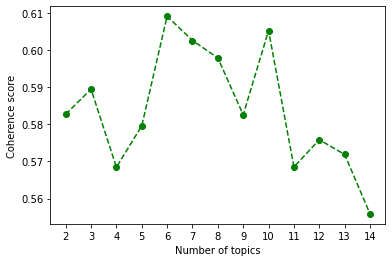

In [49]:
import matplotlib.pyplot as plt

plt.plot(topic_num,cv_score,color='green', marker='o', linestyle='dashed')
plt.xticks(range(2,15))
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.show()

### we will be going with number of topic 6 as with 8 topics there will be many overlaps 

In [50]:
# Creating LDA model with number of topics as 6

Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=6, id2word=dictionary, passes=10,random_state=45)
clear_output()
print(CoherenceModel(model=ldamodel,texts=review_data['clean_review'],\
                     dictionary=dictionary , coherence='c_v').get_coherence())

0.6091161154634883


In [51]:
ldamodel.print_topics()

[(0,
  '0.156*"camera" + 0.078*"quality" + 0.039*"phone" + 0.022*"sound" + 0.021*"front" + 0.018*"mode" + 0.015*"depth" + 0.014*"performance" + 0.014*"display" + 0.014*"rear"'),
 (1,
  '0.082*"note" + 0.070*"lenovo" + 0.039*"phone" + 0.025*"call" + 0.024*"feature" + 0.017*"android" + 0.016*"product" + 0.012*"option" + 0.011*"speaker" + 0.011*"stock"'),
 (2,
  '0.154*"mobile" + 0.084*"problem" + 0.046*"heating" + 0.038*"product" + 0.038*"amazon" + 0.034*"issue" + 0.022*"return" + 0.018*"network" + 0.015*"lenovo" + 0.013*"time"'),
 (3,
  '0.076*"phone" + 0.036*"money" + 0.034*"screen" + 0.025*"charger" + 0.022*"product" + 0.021*"lenovo" + 0.021*"turbo" + 0.019*"waste" + 0.014*"amazon" + 0.013*"value"'),
 (4,
  '0.086*"phone" + 0.040*"update" + 0.038*"issue" + 0.026*"problem" + 0.025*"service" + 0.022*"lenovo" + 0.021*"network" + 0.021*"software" + 0.013*"volta" + 0.012*"call"'),
 (5,
  '0.135*"battery" + 0.126*"phone" + 0.035*"price" + 0.030*"awesome" + 0.030*"camera" + 0.030*"fast" + 0.

In [54]:
pyLDAvis.gensim_models.prepare(ldamodel,doc_term_matrix,dictionary)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.151077 -0.183800       1        1  21.159834
3      0.081218 -0.004608       2        1  18.222326
0     -0.279494  0.006759       3        1  17.256118
1     -0.012698  0.279254       4        1  15.857927
2      0.224529 -0.098105       5        1  14.428330
4      0.137521  0.000500       6        1  13.075465, topic_info=        Term         Freq        Total Category  logprob  loglift
15    mobile  2208.000000  2208.000000  Default  30.0000  30.0000
77    camera  3300.000000  3300.000000  Default  29.0000  29.0000
5    battery  3096.000000  3096.000000  Default  28.0000  28.0000
117  quality  1341.000000  1341.000000  Default  27.0000  27.0000
34      note  1312.000000  1312.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
50   heating   132.785938  1249.732989   Topic6  -4.5803  -0.2075
150     work    88.727584   604.697023   Topic6  -4.9834   0.1153
49     month    79.606514   509.547508   Topic6  -5.0919   0.1780
205     hang    63.683875   221.282255   Topic6  -5.3151   0.7889
108      day    66.222488   479.081646   Topic6  -5.2760   0.0556

[398 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
806       6  0.971243     accept
391       2  0.966050  accessory
534       5  0.983278     airtel
1748      6  0.944513      alarm
3         1  0.084377     amazon
...     ...       ...        ...
116       2  0.629777      worth
116       3  0.108934      worth
116       6  0.003404      worth
1151      1  0.961934  yesterday
431       3  0.973765       zoom

[608 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 1, 2, 3, 5])

In [55]:
review_data.head()

,review,clean_review
0,Good but need updates and improvements,"[need, update, improvement]"
1,"Worst mobile i have bought ever, Battery is dr...","[mobile, bought, battery, hell, backup, hour, ..."
2,when I will get my 10% cash back.... its alrea...,"[cash, january]"
3,The worst phone everThey have changed the last...,"[phone, everthey, phone, problem, amazon, phon..."
4,Only I'm telling don't buyI'm totally disappoi...,"[buyi, disappointedpoor, batterypoor, camerawa..."


### Creating a lookup table for topics

In [56]:
topic_lookup_data = pd.DataFrame((ldamodel.print_topics()),columns=['Topic_Number','Top_Keywords'])
topic_lookup_data['Topic_Name'] = ['Camera, Sound','Mixed issues','Heating issue','turbo charger','Connectivity','Battery']
topic_lookup_data = topic_lookup_data[['Topic_Number','Topic_Name','Top_Keywords']]
topic_lookup_data['Top_Keywords'] = topic_lookup_data.Top_Keywords.str\
.replace(r'[^a-z]',' ',regex=True).apply(lambda x: x.split())
topic_lookup_data.style.set_properties(subset=['Top_Keywords'], **{'width': '300px'})

,Topic_Number,Topic_Name,Top_Keywords
0,0,"Camera, Sound","['camera', 'quality', 'phone', 'sound', 'front', 'mode', 'depth', 'performance', 'display', 'rear']"
1,1,Mixed issues,"['note', 'lenovo', 'phone', 'call', 'feature', 'android', 'product', 'option', 'speaker', 'stock']"
2,2,Heating issue,"['mobile', 'problem', 'heating', 'product', 'amazon', 'issue', 'return', 'network', 'lenovo', 'time']"
3,3,turbo charger,"['phone', 'money', 'screen', 'charger', 'product', 'lenovo', 'turbo', 'waste', 'amazon', 'value']"
4,4,Connectivity,"['phone', 'update', 'issue', 'problem', 'service', 'lenovo', 'network', 'software', 'volta', 'call']"
5,5,Battery,"['battery', 'phone', 'price', 'awesome', 'camera', 'fast', 'performance', 'backup', 'product', 'heating']"


### Creating new columns and inserting topic numbers and names

In [57]:
for index,sent in enumerate(ldamodel[doc_term_matrix]):
  topic_num =[]
  topic_details = sorted(sent,key=lambda x: x[1], reverse=True)[:2] # Getting top 2 topics in descending order
  topic_num.append(topic_details[0][0]) # Appending top topic
  if len(topic_details) > 1:
    if topic_details[1][1] > 0.35: # Appending second topic only if it has more than 35% influence on current row
      topic_num.append(topic_details[1][0])
  review_data.loc[index,'Topic_Number'] = ','.join(str(x) for x in sorted(topic_num))

In [58]:
for index,topic_num in enumerate(review_data.Topic_Number):
  topic_name_list=[]
  for single_topic_num in topic_num.split(','):
    single_topic_num=int(single_topic_num)
    topic_name_list.append(topic_lookup_data.loc\
                           [topic_lookup_data.Topic_Number == single_topic_num,'Topic_Name'][single_topic_num]) 
  # Extracting topic names from lookup table
  review_data.loc[index,'Topic_Name'] =' & '.join(topic_name_list)

In [59]:
review_data.head()

,review,clean_review,Topic_Number,Topic_Name
0,Good but need updates and improvements,"[need, update, improvement]","0,4","Camera, Sound & Connectivity"
1,"Worst mobile i have bought ever, Battery is dr...","[mobile, bought, battery, hell, backup, hour, ...",3,turbo charger
2,when I will get my 10% cash back.... its alrea...,"[cash, january]",0,"Camera, Sound"
3,The worst phone everThey have changed the last...,"[phone, everthey, phone, problem, amazon, phon...",3,turbo charger
4,Only I'm telling don't buyI'm totally disappoi...,"[buyi, disappointedpoor, batterypoor, camerawa...",4,Connectivity


### Visualization

In [60]:
import seaborn as sns

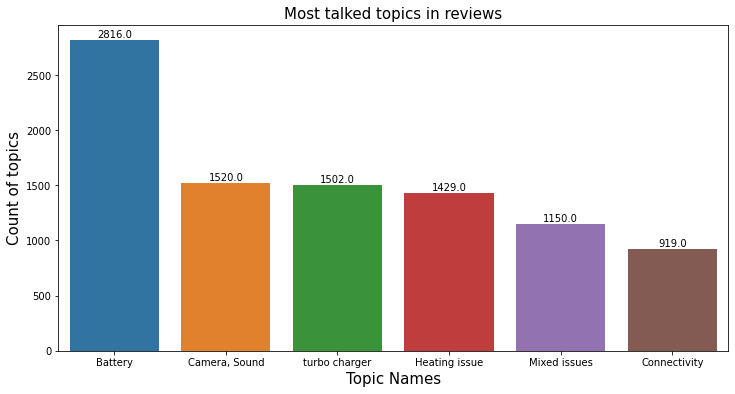

In [61]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=review_data.Topic_Name.value_counts()[:6].index,y=review_data.Topic_Name.value_counts()[:6].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+50),ha = 'center', va = 'center')
plt.xlabel('Topic Names',size=15)
plt.ylabel('Count of topics',size=15)
plt.title('Most talked topics in reviews',size=15)
plt.show()

### From above graph we can say that most of customers had issues with Battery of mobile

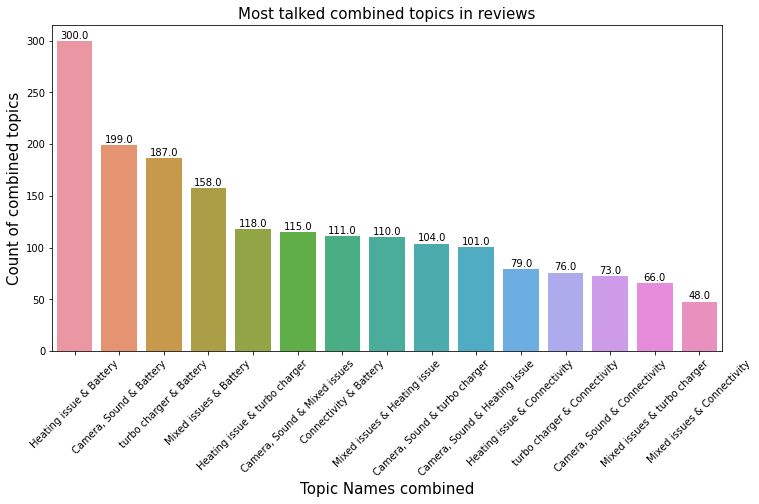

In [62]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=review_data.Topic_Name.value_counts()[6:].index,y=review_data.Topic_Name.value_counts()[6:].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+5),ha = 'center', va = 'center')
plt.xlabel('Topic Names combined',size=15)
plt.ylabel('Count of combined topics',size=15)
plt.title('Most talked combined topics in reviews',size=15)
plt.xticks(rotation=45)
plt.show()

From above graph we can say that most of customers had combined issues with,

1.Heating issue & Battery

2.Camera, Sound & Battery

3.turbo charger & Battery

### Extracting reviews of 5 topic(review of battery)

In [63]:
review_data.loc[review_data.Topic_Number.str.contains('5'),['review','Topic_Name']].head(10)\
.style.set_properties(subset=['review'], **{'width': '300px'})

,review,Topic_Name
5,"Phone is awesome. But while charging, it heats up allot..Really a genuine reason to hate Lenovo k8 note",Battery
10,"Don't purchase this item, It is so much of heating &Battery life is very poor",Heating issue & Battery
12,Very good phone slim good battry backup good screen love it,Battery
15,Battery draining very rapidly I don't know why..Tell me possible solutions for battery life,Heating issue & Battery
17,"Excellent camera , excellent speed.excellent features.excelent battery.",Battery
18,It is not a very good product camera are very poor ...Os is not good...Battery draining very quickly...Like a odinary phone..It was fully unexpected product from Lenovo..,Battery
21,Awesome phone in this price and this is my second mobile from lenovo. It is fast and display has been improved.,Heating issue & Battery
24,"Before the new update of 8.0 Oreo, it worked superbly, the battery back-up is also superb and there is not that much heating problem...But... After that update, my phone got heating up simply, battery is also draining unnecessarily... really very much disappointed after that update of 8.0 Oreo...😒😒☹️",Connectivity & Battery
26,Good performance but the battery gets oveheated,Battery
27,Best camera and better backup is very bestIn this priceFull passa wasole phone,Battery
